# Importing libraries 

In [1]:
#Import libraries 

import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy 

# Importing data 

In [2]:
#create a path 
path = r'/Users/scarlettgrim/Python Projects/01-2024 Instacart Basket Analysis'

In [3]:
#importing orders_products_all.pkl
df_ords_prods = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'ords_prods_region.pkl'))

# Step 5 - profiling based on age, income, department_id and number of dependents

In [4]:
df_ords_prods.shape

(32404859, 30)

In [5]:
df_ords_prods['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

In [6]:
#removing scientific notation format 

pd.set_option('display.float_format', lambda x: '%.2f' % x) 

In [7]:
#trying to describe again 

df_ords_prods['income'].describe()

count   32404859.00
mean       99437.73
std        43057.27
min        25903.00
25%        67004.00
50%        96618.00
75%       127912.00
max       593901.00
Name: income, dtype: float64

In [88]:
#setting income thresholds for low and high income 

low_income_threshold = 50000
high_income_threshold = 100000

In [9]:
#creating an income category column

df_ords_prods['income_category'] = pd.cut(
    df_ords_prods['income'], 
    bins =[-float('inf'), low_income_threshold, high_income_threshold, float('inf')], 
    labels=['low income', 'middle income', 'high income'],
    include_lowest= True)

In [10]:
#checking column was added 

df_ords_prods.shape

(32404859, 31)

In [11]:
df_ords_prods['income_category'].value_counts()

income_category
high income      14814202
middle income    13996574
low income        3594083
Name: count, dtype: int64

In [12]:
#normalizing income data 

income_category_normalization = (df_ords_prods['income_category'].value_counts(normalize=True) * 100).sort_index()

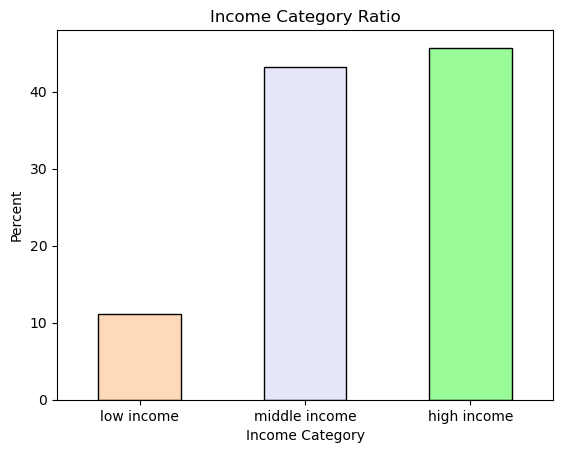

In [13]:
#creating a bar chart for income category 

bar_income_category = income_category_normalization.plot.bar(edgecolor = 'black', color = ['peachpuff', 'lavender', 'palegreen'])
plt.xlabel('Income Category')
plt.ylabel('Percent')
plt.title('Income Category Ratio')
plt.xticks(rotation=0)
plt.show()

In [14]:
#save income_category_normalization as a png 

bar_income_category.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_income_category_normalization.png'))

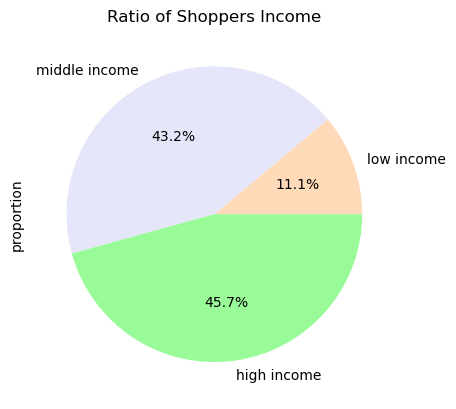

In [15]:
#creating a pie chart for income category 

pie_income = income_category_normalization.plot.pie(labels=income_category_normalization.index, autopct='%1.1f%%', colors=['peachpuff', 'lavender', 'palegreen'])
plt.title('Ratio of Shoppers Income')
plt.show()

In [16]:
#save pie_income as a png 

pie_income.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'ratio_shoppers_income.png'))

# Creating age group column

In [17]:
#creating customer age groups 

df_ords_prods['age'].describe()

count   32404859.00
mean          49.47
std           18.49
min           18.00
25%           33.00
50%           49.00
75%           65.00
max           81.00
Name: age, dtype: float64

In [18]:
#create age_group column with value as 'Unknown'

df_ords_prods['age_group'] = 'Unknown'

In [19]:
#assign values to new age_group column 

df_ords_prods.loc[(df_ords_prods['age'] >= 18) & (df_ords_prods['age'] <= 28), 'age_group'] = 'young adult'
df_ords_prods.loc[(df_ords_prods['age'] >= 29) & (df_ords_prods['age'] <= 40), 'age_group'] = 'adult'
df_ords_prods.loc[(df_ords_prods['age'] >= 41) & (df_ords_prods['age'] <= 55), 'age_group'] = 'middle-aged'
df_ords_prods.loc[(df_ords_prods['age'] >= 56) & (df_ords_prods['age'] <= 70), 'age_group'] = 'senior'
df_ords_prods.loc[(df_ords_prods['age'] >= 71) & (df_ords_prods['age'] <= 82), 'age_group'] = 'elderly'

In [20]:
#looking at age group

df_ords_prods['age_group'].value_counts()

age_group
middle-aged    7642653
senior         7513990
adult          6099863
elderly        5578170
young adult    5570183
Name: count, dtype: int64

In [21]:
#normalizing age_groups

age_group_percent = (df_ords_prods['age_group'].value_counts(normalize=True) * 100).sort_index()

In [22]:
#checking ouptput 

age_group_percent

age_group
adult         18.82
elderly       17.21
middle-aged   23.58
senior        23.19
young adult   17.19
Name: proportion, dtype: float64

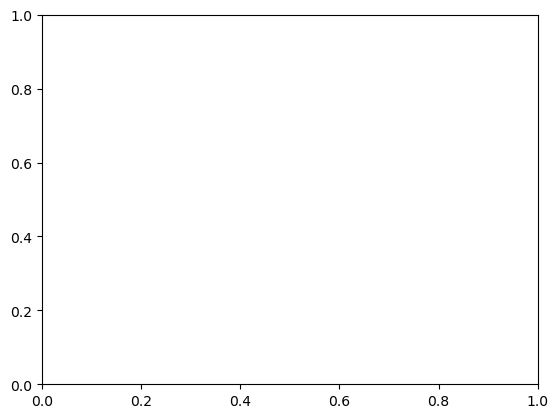

In [23]:
fig, ax = plt.subplots()

In [24]:
#creatingn a pie chart for age group

age_group_pie = ax.pie(age_group_percent, labels=age_group_percent.index, autopct='%1.1f%%',  colors=['mediumpurple', 'peachpuff', 'palegreen', 'lightskyblue', 'pink'])
ax.set_title('Age Group Ratio')


Text(0.5, 1.0, 'Age Group Ratio')

In [25]:
#save age_group_pie as a png 

fig.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'age_group_pie.png'))

In [26]:
plt.ion()

In [27]:
plt.show()

# Creating a dependent flag 

In [28]:
#creating a dependents flag - first looking at the dependents column 
#to see how I want to group them 

df_ords_prods['number_of_dependents'].value_counts()

number_of_dependents
3    8135109
0    8097503
2    8091143
1    8081104
Name: count, dtype: int64

In [29]:
df_ords_prods.shape

(32404859, 32)

In [30]:
df_ords_prods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 32 columns):
 #   Column                     Dtype   
---  ------                     -----   
 0   order_id                   object  
 1   user_id                    object  
 2   order_number               int64   
 3   orders_day_of_week         int64   
 4   order_hour_of_day          int64   
 5   days_from_last_order       float64 
 6   product_id                 int64   
 7   add_to_cart_order          int64   
 8   reordered                  int64   
 9   product_name               object  
 10  department_id              int64   
 11  prices                     float64 
 12  price_range_loc            object  
 13  busiest_day                object  
 14  two_busiest_days           object  
 15  busiest_period_of_day      object  
 16  max_order                  int64   
 17  loyalty_flag               object  
 18  avg_spend                  float64 
 19  spending_flag      

In [31]:
#define a function to apply the condition

def create_dependent_flag(dependents):
    if dependents == 0:
        return 'no dependents'
    else:
        return 'Dependents'


In [32]:
#apply the function to create the a dependents_flag column 

df_ords_prods['dependent_flag'] = df_ords_prods['number_of_dependents'].apply(lambda x: create_dependent_flag(x))

In [33]:
# value counts 
df_ords_prods['dependent_flag'].value_counts(dropna = False)

dependent_flag
Dependents       24307356
no dependents     8097503
Name: count, dtype: int64

In [34]:
df_ords_prods['dependent_flag'].head()

0    Dependents
1    Dependents
2    Dependents
3    Dependents
4    Dependents
Name: dependent_flag, dtype: object

In [35]:
df_ords_prods.dtypes

order_id                       object
user_id                        object
order_number                    int64
orders_day_of_week              int64
order_hour_of_day               int64
days_from_last_order          float64
product_id                      int64
add_to_cart_order               int64
reordered                       int64
product_name                   object
department_id                   int64
prices                        float64
price_range_loc                object
busiest_day                    object
two_busiest_days               object
busiest_period_of_day          object
max_order                       int64
loyalty_flag                   object
avg_spend                     float64
spending_flag                  object
med_days_since_last_order     float64
Frequency_flag                 object
Gender                         object
state                          object
age                             int64
number_of_dependents            int64
marital_stat

In [36]:
#converting data-type to string

df_ords_prods['income_category'] = df_ords_prods['income_category'].astype(str)
df_ords_prods['dependent_flag'] = df_ords_prods['dependent_flag'].astype(str)

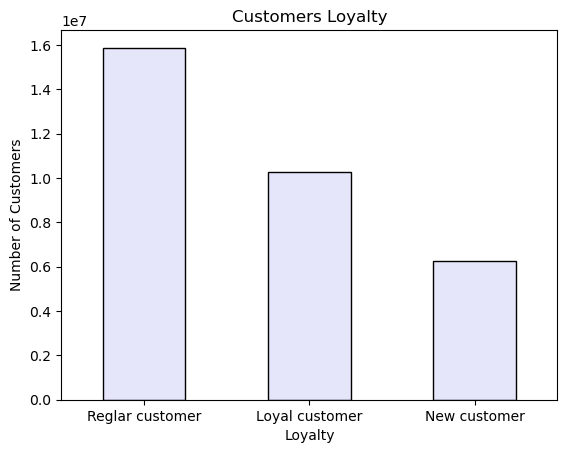

In [37]:
#creating a bar chart for the loyaltiy and number of orders

bar_orders_loyalty = df_ords_prods['loyalty_flag'].value_counts().plot.bar(title = 'Customers Loyalty', xlabel = 'Loyalty', ylabel = 'Number of Customers', edgecolor = 'black', color = 'lavender')
plt.xticks(rotation=0)
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_loyalty_flag.png'))

# Creating customer profiles

In [38]:
#creating new column customer_profile 

df_ords_prods['customer_profile'] = df_ords_prods['age_group'] + ', ' + df_ords_prods['income_category'] + ', ' + df_ords_prods['dependent_flag']

In [39]:
#checking new column 

df_ords_prods['customer_profile'].head()

0    adult, low income, Dependents
1    adult, low income, Dependents
2    adult, low income, Dependents
3    adult, low income, Dependents
4    adult, low income, Dependents
Name: customer_profile, dtype: object

In [40]:
df_ords_prods.shape

(32404859, 34)

In [41]:
df_ords_prods['customer_profile'].value_counts()

customer_profile
middle-aged, high income, Dependents         3980421
senior, high income, Dependents              3919193
adult, middle income, Dependents             3705814
young adult, middle income, Dependents       3419737
elderly, high income, Dependents             2915689
middle-aged, high income, no dependents      1324600
senior, high income, no dependents           1324489
middle-aged, middle income, Dependents       1258297
adult, middle income, no dependents          1236046
senior, middle income, Dependents            1224445
young adult, middle income, no dependents    1104810
elderly, high income, no dependents           977269
elderly, middle income, Dependents            914699
adult, low income, Dependents                 715666
young adult, low income, Dependents           643290
middle-aged, low income, Dependents           507531
senior, low income, Dependents                462627
senior, middle income, no dependents          418068
middle-aged, middle income, n

In [42]:
df_ords_prods['customer_profile'].describe()

count                                 32404859
unique                                      30
top       middle-aged, high income, Dependents
freq                                   3980421
Name: customer_profile, dtype: object

# Customer profile sales 

In [43]:
#grouping customer profiles and prices

customer_profile_revenue = df_ords_prods.groupby('customer_profile')['prices'].sum()

In [44]:
#sorting values 

customer_profile_revenue_sorted = customer_profile_revenue.sort_values(ascending=False)

<function matplotlib.pyplot.show(close=None, block=None)>

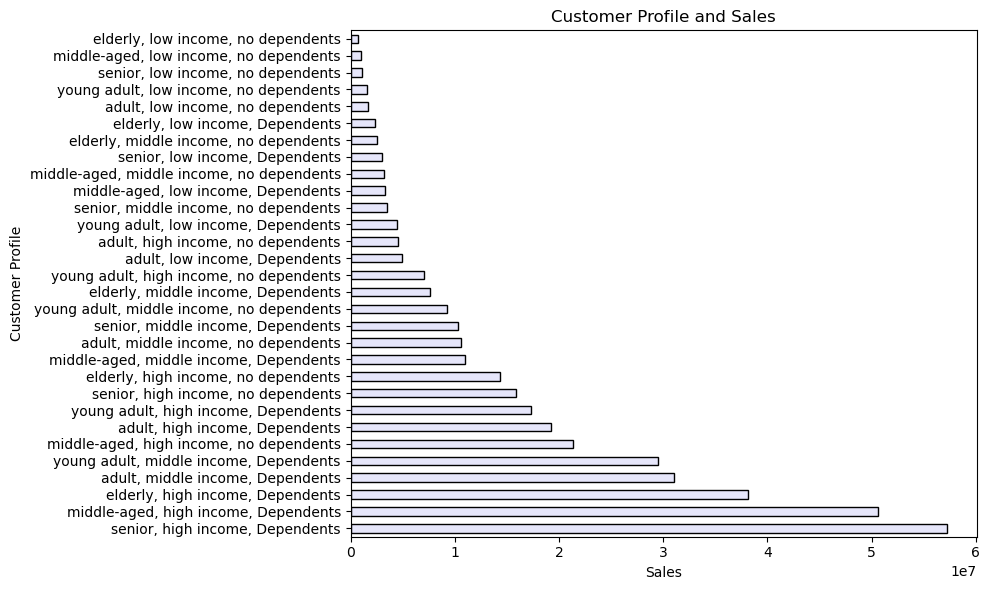

In [45]:
#creating bar chart for customer profiles and sales

bar_customer_profile = customer_profile_revenue_sorted.plot.barh(title = 'Customer Profile and Sales', xlabel = 'Sales', ylabel = 'Customer Profile', edgecolor = 'black', color = 'lavender')
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.tight_layout()
plt.show

In [46]:
#saving as bar chart as png

bar_customer_profile.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_customer_profile_sales.png'))

# Customer profile order frequency 

In [47]:
#grouping customer_profile with days_since_prior_order

customer_profile_order_frequency = df_ords_prods.groupby('customer_profile')['days_from_last_order'].mean()

In [48]:
#sorting values 

customer_profile_order_frequency_sorted = customer_profile_order_frequency.sort_values(ascending=True)

<function matplotlib.pyplot.show(close=None, block=None)>

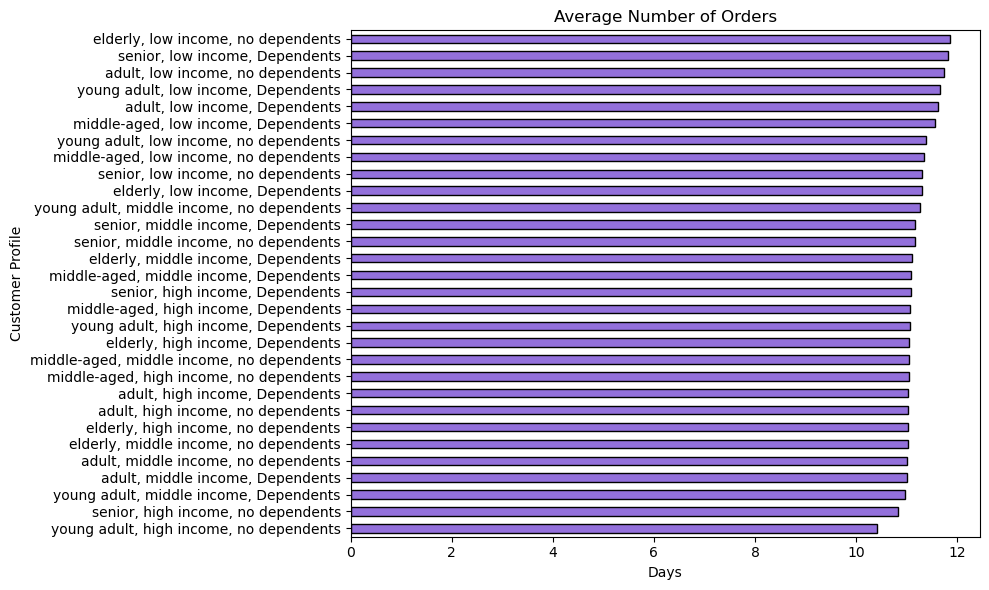

In [49]:
# Creating bar chart for order invervals
bar_customer_profile_order_intervals = customer_profile_order_frequency_sorted.plot.barh(title = 'Average Number of Orders', xlabel = 'Days', ylabel = 'Customer Profile', edgecolor = 'black', color = 'mediumpurple')
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.tight_layout()
plt.show

In [50]:
#saving as png
bar_customer_profile_order_intervals.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_customer_profile_order_intervals.png'))

# Order time among customer profiles 

In [51]:
#group by customer profile and order hour of day

order_hour_day = df_ords_prods.groupby(['customer_profile', 'order_hour_of_day']).size().unstack()

In [52]:
#calculating mode 

customer_profile_order_hours_mode = df_ords_prods.groupby('customer_profile')['order_hour_of_day'].apply(lambda x: x.mode().iloc[0])

In [53]:
#create a DataFrame for plotting

plot_data = pd.DataFrame({'customer_profile': customer_profile_order_hours_mode.index, 'customer_profile_order_hours_mode': customer_profile_order_hours_mode.values})

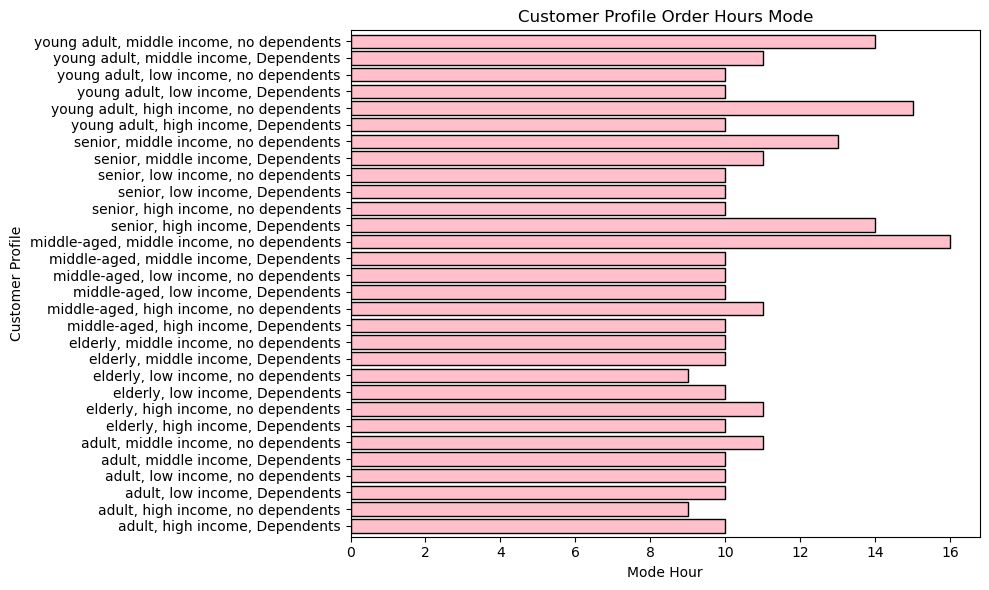

In [54]:
#creating bar chart for customer profile and order hours

customer_profile_order_hours_mode_bar = plot_data.plot(kind='barh', x='customer_profile', y='customer_profile_order_hours_mode', edgecolor = 'black', color='pink', legend=False, title='Customer Profile Order Hours Mode', xlabel='Mode Hour', ylabel='Customer Profile', width=0.8)
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.tight_layout()
plt.show()

In [55]:
#save as png 

customer_profile_order_hours_mode_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'customer_profile_order_hours_mode_bar.png'))

# Loyal customers daily orders placed 

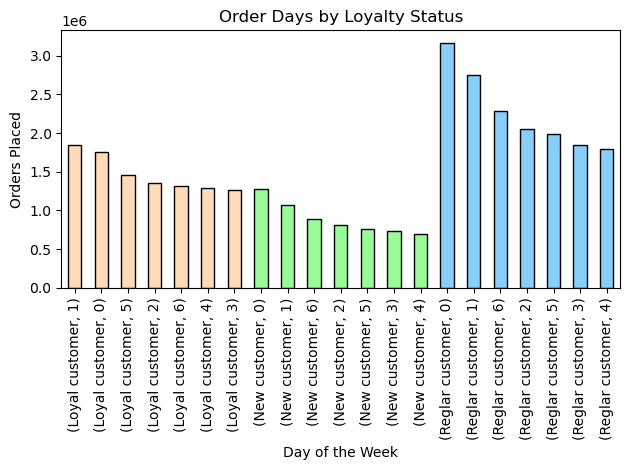

In [56]:
loyalty_day_order_bar = df_ords_prods.groupby('loyalty_flag')['orders_day_of_week'].value_counts().plot.bar(title = 'Order Days by Loyalty Status', xlabel = 'Day of the Week', ylabel = 'Orders Placed', edgecolor = 'black', color=['peachpuff'] * 7 + ['palegreen'] * 7 + ['lightskyblue'] * 7)
plt.tight_layout()

In [57]:
#saving as a png
loyalty_day_order_bar .figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'loyalty_day_order_bar .png'))

# Departments and orders 

In [58]:
#mapping deparment id to names

department_mapping = {
    1: "frozen",
    2: "other",
    3: "bakery",
    4: "produce",
    5: "alcohol",
    6: "international",
    7: "beverages",
    8: "pets",
    9: "dry goods pasta",
    10: "bulk",
    11: "personal care",
    12: "meat seafood",
    13: "pantry",
    14: "breakfast",
    15: "canned goods",
    16: "dairy eggs",
    17: "household",
    18: "babies",
    19: "snacks",
    20: "deli",
}

In [59]:
#create the department name column

df_ords_prods['department_name'] = df_ords_prods['department_id'].map(department_mapping).fillna("missing")

In [60]:
df_ords_prods['department_name'].head()

0    beverages
1    beverages
2    beverages
3    beverages
4    beverages
Name: department_name, dtype: object

In [61]:
df_ords_prods.shape

(32404859, 35)

In [62]:
df_ords_prods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 35 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   order_id                   object 
 1   user_id                    object 
 2   order_number               int64  
 3   orders_day_of_week         int64  
 4   order_hour_of_day          int64  
 5   days_from_last_order       float64
 6   product_id                 int64  
 7   add_to_cart_order          int64  
 8   reordered                  int64  
 9   product_name               object 
 10  department_id              int64  
 11  prices                     float64
 12  price_range_loc            object 
 13  busiest_day                object 
 14  two_busiest_days           object 
 15  busiest_period_of_day      object 
 16  max_order                  int64  
 17  loyalty_flag               object 
 18  avg_spend                  float64
 19  spending_flag              object 
 20  

In [63]:
df_ords_prods['department_name'].value_counts()

department_name
produce            9479291
dairy eggs         5398747
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: count, dtype: int64

In [64]:
#grouping department name and loyalty flag

loyal_dept_group = df_ords_prods.groupby(['department_name', 'loyalty_flag']).size().unstack()

In [65]:
#sorting values

loyal_dept_group = loyal_dept_group.sort_values(by = 'Reglar customer', ascending = False)

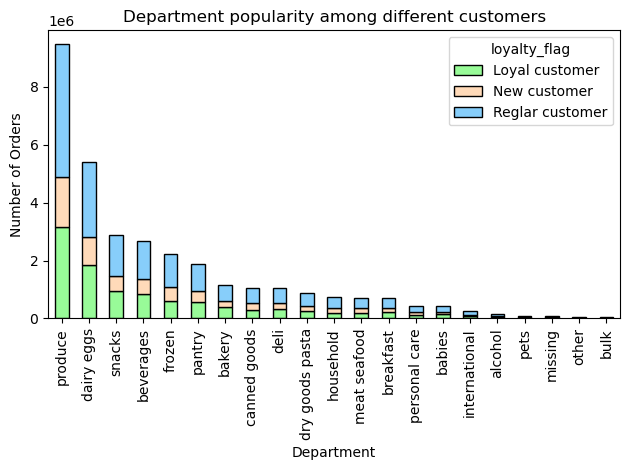

In [66]:
#creating bar chart 

colors = ['palegreen', 'peachpuff','lightskyblue']
loyal_dept_group = loyal_dept_group.plot(kind = 'bar', stacked = True, edgecolor = 'black', color = colors)
plt.title('Department popularity among different customers')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

In [67]:
#saving as png

loyal_dept_group.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'loyal_dept_group.png'))

# Step 7 aggregating cusotmer profile for usage frequency and expenditure 

In [68]:
# aggregating customer profile

aggregate_customer_profile = df_ords_prods.groupby('user_id').agg({
    'age': ['max', 'mean', 'min'],
    'number_of_dependents': ['max', 'mean', 'min']
}).reset_index()

In [69]:
#renaming columns in aggregate_cusotmer_profile

aggregate_customer_profile.columns = ['user_id', 'max_age', 'mean_age', 'min_age', 'max_dependants', 'mean_dependants', 'min_dependants']

In [70]:
#printing the outputs

print(aggregate_customer_profile)

       user_id  max_age  mean_age  min_age  max_dependants  mean_dependants  \
0            1       31     31.00       31               3             3.00   
1           10       34     34.00       34               2             2.00   
2          100       64     64.00       64               2             2.00   
3         1000       25     25.00       25               1             1.00   
4        10000       33     33.00       33               0             0.00   
...        ...      ...       ...      ...             ...              ...   
206204   99995       43     43.00       43               3             3.00   
206205   99996       41     41.00       41               1             1.00   
206206   99997       27     27.00       27               1             1.00   
206207   99998       38     38.00       38               3             3.00   
206208   99999       40     40.00       40               1             1.00   

        min_dependants  
0                    3  
1

# Step 8 and 9 comparing department results by region 

In [71]:
#grouping deparment_name by region

dept_by_region = df_ords_prods.groupby(['department_name', 'region']).size().unstack()

In [72]:
#sorting values

dept_by_region = dept_by_region.sort_values(by = 'Midwest', ascending = False)

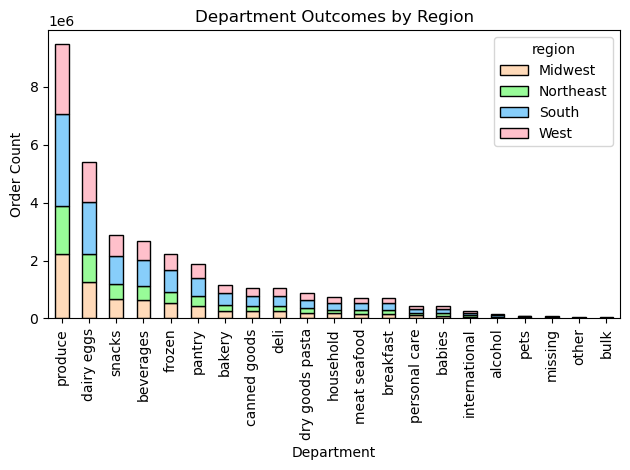

In [73]:
#creating bar chart

colors = ['peachpuff', 'palegreen','lightskyblue', 'pink']
dept_by_region_bar = dept_by_region.plot(kind='bar', stacked=True, edgecolor = 'black', color=colors)
plt.title('Department Outcomes by Region')
plt.xlabel('Department')
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()

In [74]:
#save as png 

dept_by_region_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'dept_by_region_bar.png'))

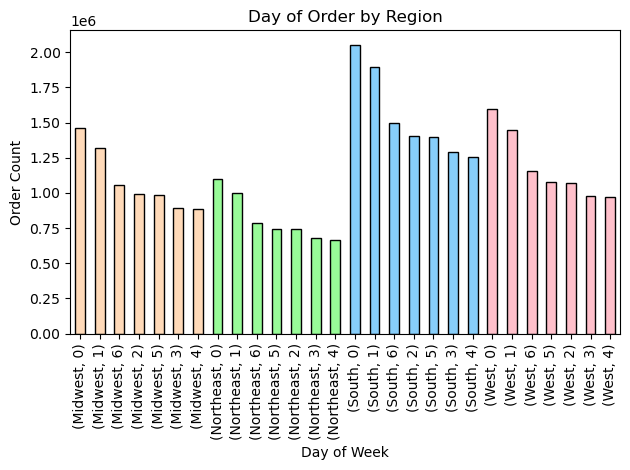

In [75]:
#bar chart for region order by day 

region_order_day_bar = df_ords_prods.groupby('region')['orders_day_of_week'].value_counts().plot.bar(title = 'Day of Order by Region', xlabel = 'Day of Week', ylabel = 'Order Count', edgecolor = 'black', color=['peachpuff'] * 7 + ['palegreen'] * 7+['lightskyblue'] * 7 + ['pink'] * 7)
plt.tight_layout()

In [76]:
#saving as png

region_order_day_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'region_order_day_bar.png'))

In [77]:
#creating crosstab

avg_price_by_region = pd.crosstab(index=df_ords_prods['region'], columns='Average Price', values=df_ords_prods['prices'], aggfunc='mean')

<function matplotlib.pyplot.show(close=None, block=None)>

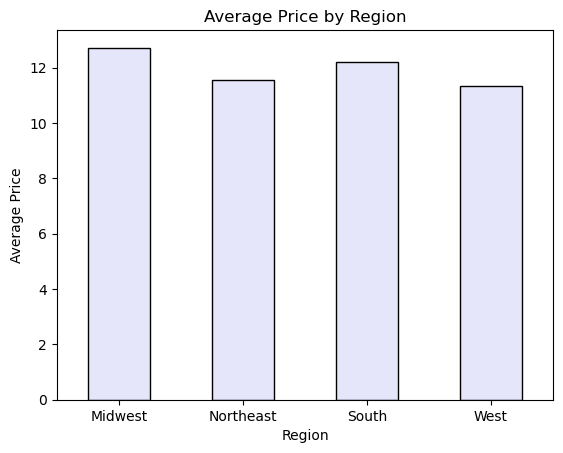

In [78]:
#creating bar chart

avg_price_by_region_bar = avg_price_by_region.plot(kind='bar', edgecolor = 'black', color='lavender', legend=None)
plt.title('Average Price by Region')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show

In [79]:
#save as png 

avg_price_by_region_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'avg_price_by_region_bar.png'))

# Top 5 departments 

In [80]:
#calculating department counts 

department_counts = df_ords_prods['department_name'].value_counts()

In [81]:
department_counts.head()

department_name
produce       9479291
dairy eggs    5398747
snacks        2887550
beverages     2688123
frozen        2234743
Name: count, dtype: int64

In [82]:
#finding top departments 

top_departments = department_counts.head(5).index

In [83]:
#grouping departments 

df_ords_prods['department_grouped'] = df_ords_prods['department_name'].where(df_ords_prods['department_name'].isin(top_departments))

In [84]:
#calculating the percentage 

department_percentage = df_ords_prods['department_grouped'].value_counts(normalize=True) * 100

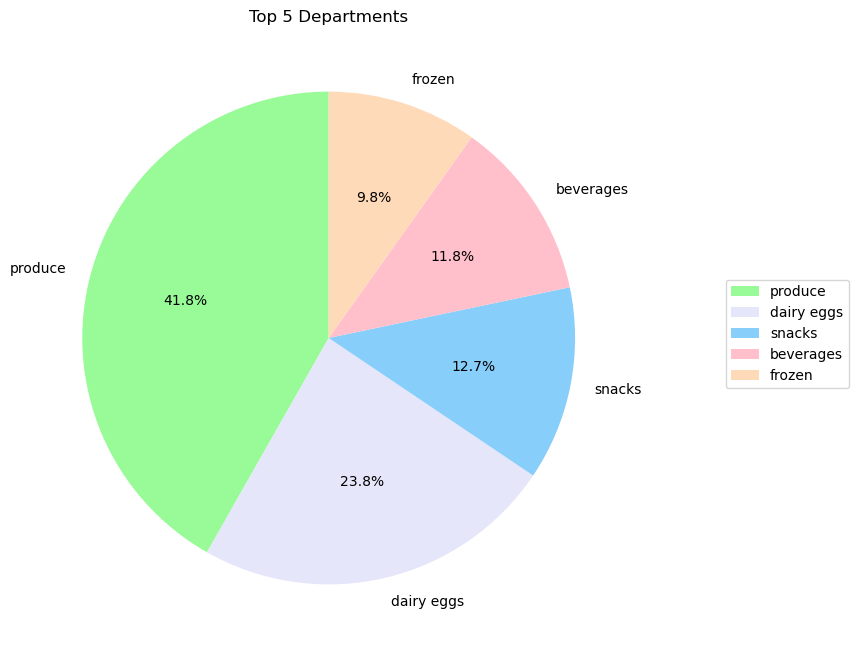

In [85]:
# Creating and saving the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
pie = ax.pie(department_percentage, labels=department_percentage.index, autopct='%1.1f%%', startangle=90, colors=['palegreen', 'lavender', 'lightskyblue', 'pink', 'peachpuff'])

ax.legend(pie[0], department_percentage.index, bbox_to_anchor=(1, 0.5), loc="center left", fontsize=10, bbox_transform=plt.gcf().transFigure)
plt.title('Top 5 Departments', )
save_path = os.path.join(path, 'Analysis', 'Visualizations', 'top_departments_pie_chart.png')
plt.savefig(save_path)
plt.show()

In [87]:
df_ords_prods.shape

(32404859, 36)

In [86]:
# Exporting dataset as pickle format
df_ords_prods.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'final_data_set.pkl'))